**<font color = "darkred" size="5">ch13.데이터 시각화 - I</font>**

In [3]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.CodeMirror {font-family:Consolas; font-size:11pt;}
div.output {font-size:11pt;}
div.input {font-family:Consolas; font-size:11pt;}
div.prompt {min-width:70px;}
</style>
"""))

# 1. 시각화 개요 

- 시각화 라이브러리
    - matplotlib, seaborn, folium(지도시각화).... <br>
- matplotlib: 파이썬에서 가장 많이 사용하는 시각화 라이브러리. 판다스에서도 내부적으로 사용 <br>
- seaborn: matplotlib을 기반으로 다양한 색, 테마, 차트 기능을 추가한 라이브러리

# 2. matplotlib 

https://matplotlib.org/stable/api/pyplot_summary.html

## (1) 패키지 임포트 및 기본 설정 

In [1]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline: 주피터노트북이 실행되는 브라우저에서 시각화를 해라. 
%config InlineBackend.figure_format='retina'; 그래프의 해상도를 높임('png'(기본), 'jpeg', svg', 'pdf') 

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
matplotlib.__version__

'3.3.2'

**matplotlib으로 그래프를 그리기 위한 단계** <br>
    1) 데이터 준비 <br>
    2) 그래프 생성 <br>
    3) 그래프 함수로 그리기 <br>
    4) 그래프 커스터마이징 <br>
    5) 그래프 출력 및 저장

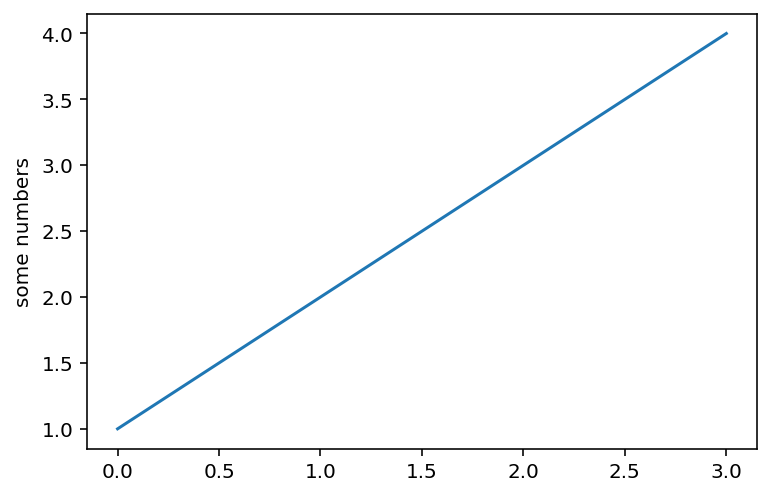

In [4]:
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

## (2) 그래프 객체

In [5]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

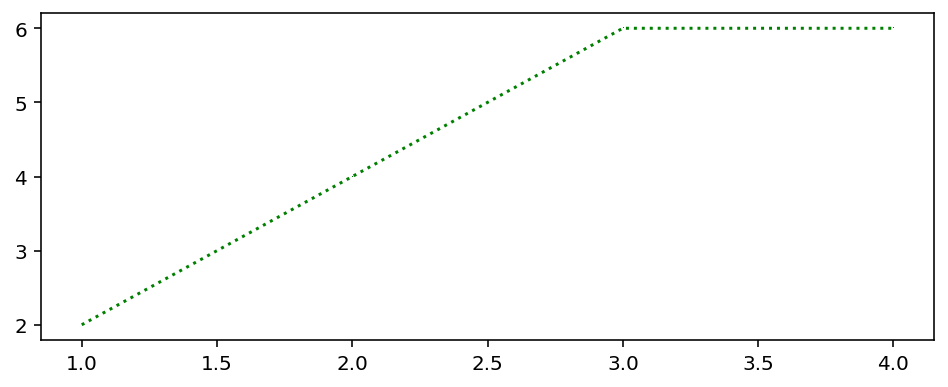

In [6]:
plt.figure(figsize=(8,3))
plt.plot([1,2,3,4], [2,4,6,6], 'g,:')
plt.show()

## (3) 그래프 영역 나누기

### 1) subplot()함수로 서브플롯 추가

In [9]:
import numpy as np
x = np.arange(0, 10, 0.01)
x.shape

(1000,)

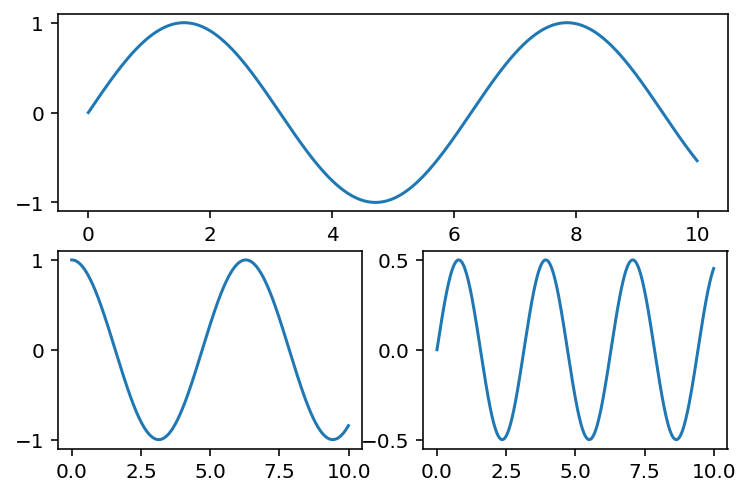

In [11]:
plt.subplot(2,1,1) # 2행1열의 subplot생성 후 첫번째 subplot에 plot을 그릴 예정
#plt.subplot(211)
plt.plot(x, np.sin(x))

plt.subplot(2,2,3)
plt.plot(x, np.cos(x))
plt.subplot(2,2,4)
plt.plot(x, np.sin(x)*np.cos(x))

plt.show()

In [20]:
# cf) 경고메시지 안보이게 설정 
import warnings 
warnings.filterwarnings(action='ignore')

In [14]:
import pandas as pd 
pd.np.nan

nan

In [15]:
# cf) 경고메시지 보이게 설정
import warnings
warnings.filterwarnings(action='default')

### 2) subplots() 함수로 서브플롯 그리기 

In [16]:
x = np.arange(0, 10, 0.01)
x.shape

(1000,)

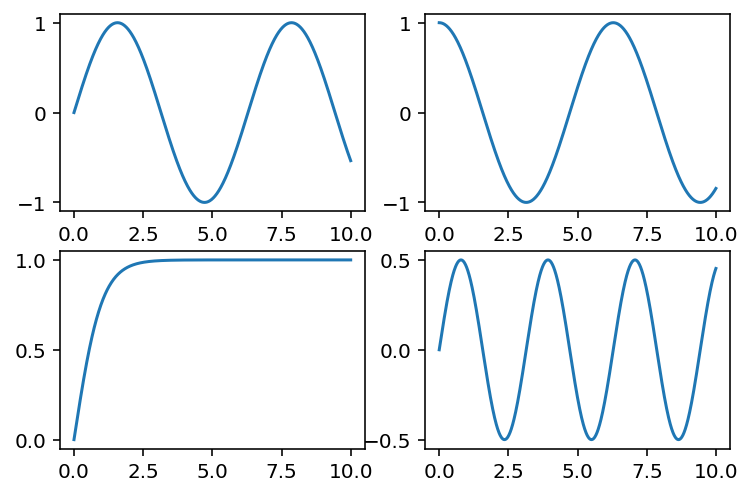

In [22]:
# 2행2열 서브플롯 만들기 - 방법1
plt.subplot(2,2,1);plt.plot(x, np.sin(x))
plt.subplot(2,2,2);plt.plot(x, np.cos(x))
plt.subplot(2,2,3);plt.plot(x, np.tanh(x))
plt.subplot(2,2,4);plt.plot(x, np.sin(x)*np.cos(x))

plt.show()

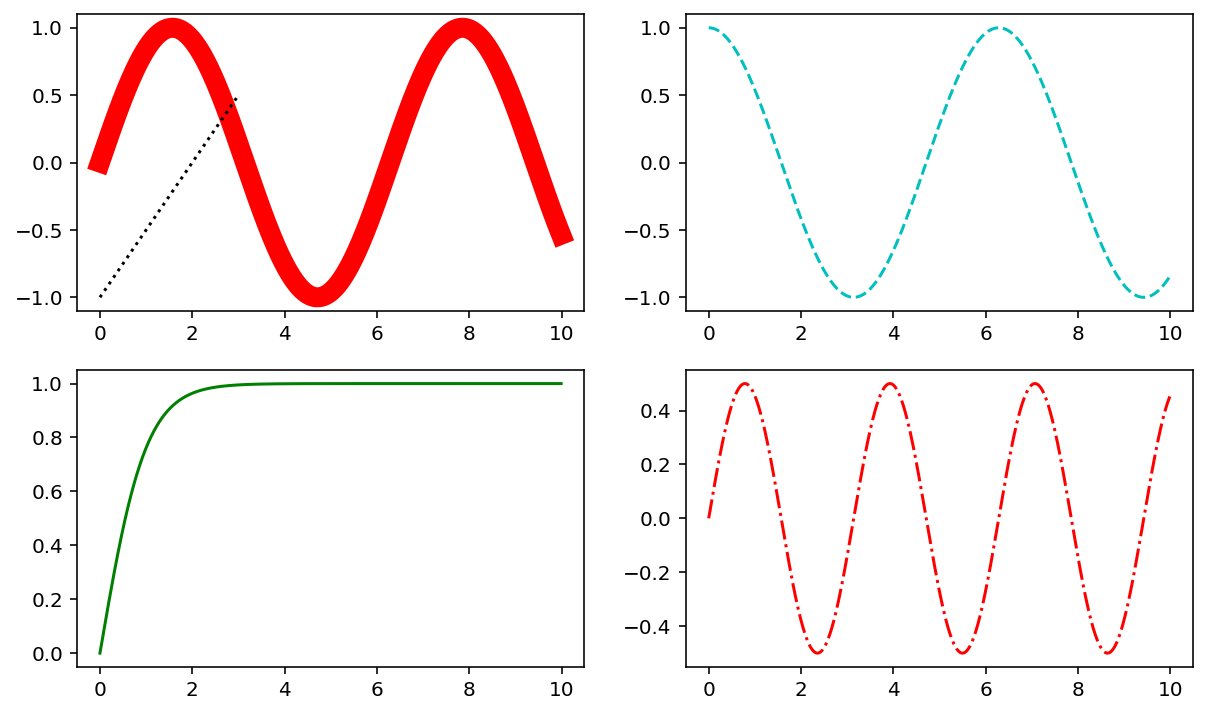

In [26]:
# 2행2열 서브플롯 만들기 - 방법2 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

axes[0,0].plot(x, np.sin(x), color='r', linewidth=10)
axes[0,0].plot([0,1,2,3], [-1, -0.5, 0, 0.5], 'k:')
axes[0,1].plot(x, np.cos(x), 'c--') # c(청록), --(대시드)
axes[1,0].plot(x, np.tanh(x), 'g')
axes[1,1].plot(x, np.sin(x)*np.cos(x), 'r-.')

plt.show()

In [27]:
# 2행2열 서브플롯 만들기 - 방법3 
x = np.arange(0, 7, 0.01)
x.shape

(700,)

In [29]:
#def sin_cos(x):
#    return np.sin(x)*np.cos(x)

# func_list = [np.sin, np.cos, np.tanh, sin_cos]

func_list = [np.sin, np.cos, np.tanh, lambda x : np.sin(x)*np.cos(x)]
fmt_list = ['k:', 'c--', 'g', 'r-.']

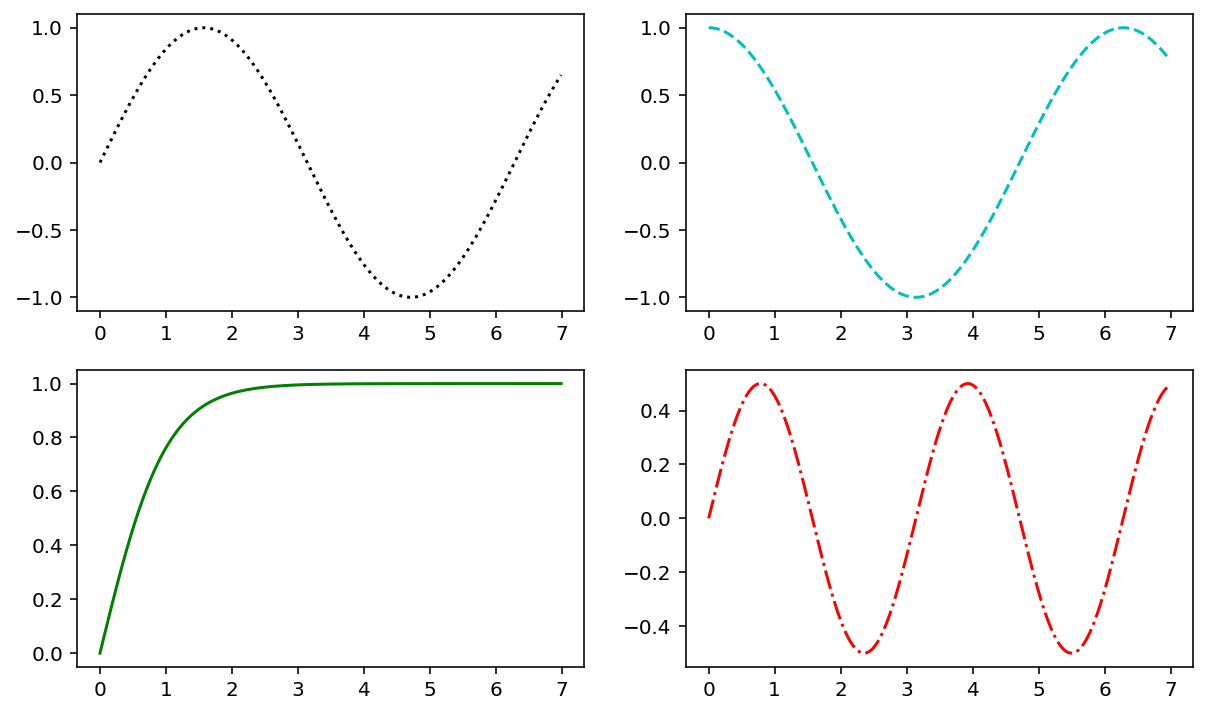

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(10,6))

# 2차원 axes를 list(axes.flat)이용해서 중첩 for문 안 씀
for i, ax in enumerate(axes.flat):
    ax.plot(x, func_list[i](x), fmt_list[i])

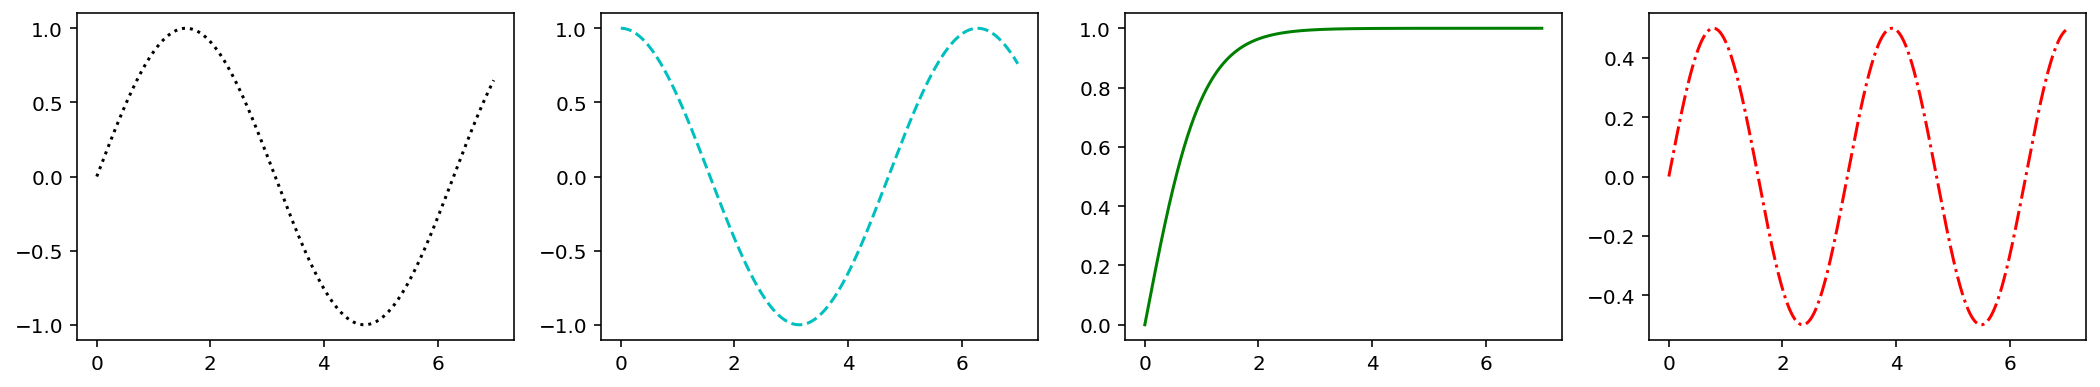

In [32]:
fig, axes = plt.subplots(ncols=4, figsize=(18,3))

for i, ax in enumerate(axes):
    ax.plot(x, func_list[i](x), fmt_list[i])

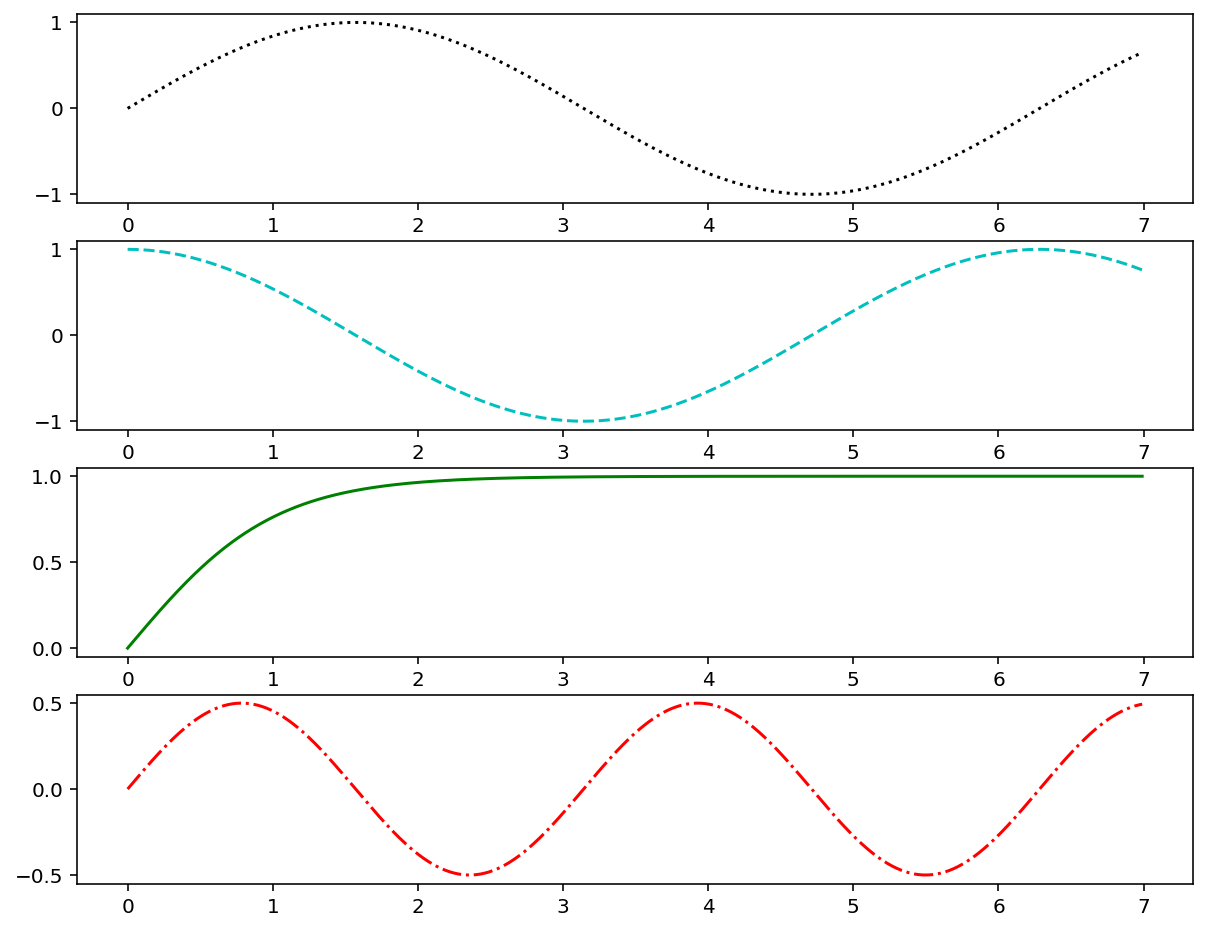

In [33]:
fig, axes = plt.subplots(nrows=4, figsize=(10,8))

for i, ax in enumerate(axes):
    ax.plot(x, func_list[i](x), fmt_list[i])

## (4) 다양한 그래프 그리기 

### 1) pyplot함수들: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html
### 2) matplotlib.pyplot.plot(); 선 그래프

In [34]:
np.random.randn(4,10) # 4행10열짜리 난수 (평균0, 표준편차1)

array([[ 0.61180584, -0.70324623, -0.4884671 , -0.87785216,  0.28731308,
        -0.51431681,  2.48225183, -0.84870058, -0.12594859, -1.37608283],
       [-1.85341831,  0.60911358, -0.34252823,  1.54304946,  0.46929324,
        -0.8207827 ,  0.11799536,  0.99562924,  0.97601439,  0.35260183],
       [-0.64293626,  0.9215024 ,  0.99837653, -0.0314163 ,  0.7013942 ,
         0.73042907, -0.12383321, -0.27750792, -1.05142469,  0.94457667],
       [ 0.74115297, -0.8341974 , -0.52939242,  0.20960284,  0.01742938,
         0.1913937 , -1.55253336, -1.88929094,  1.22361544,  0.26211178]])

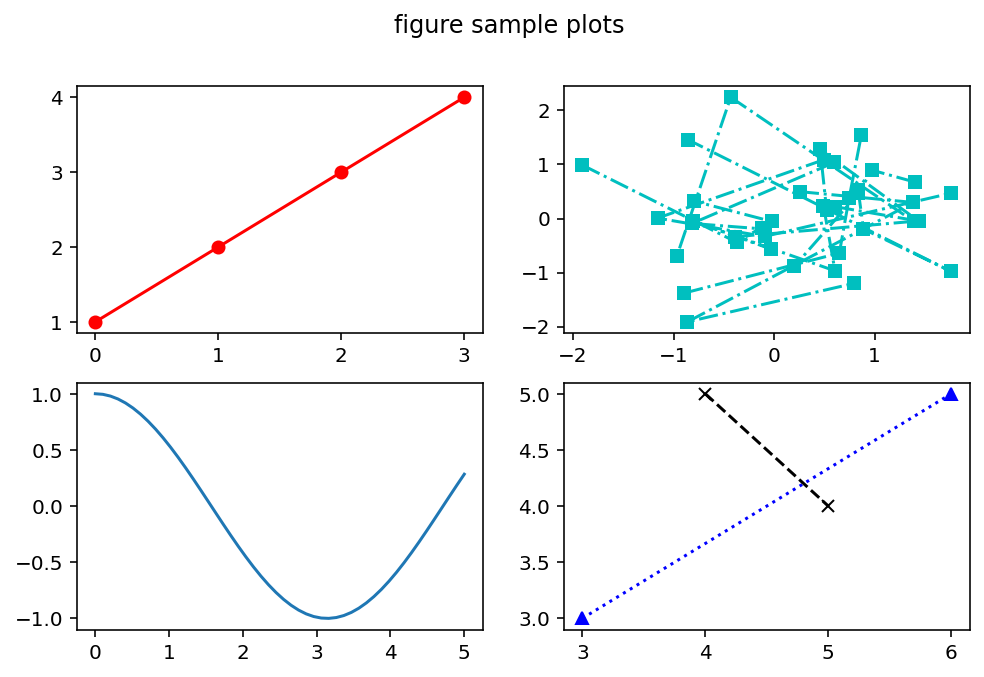

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(8,5))
fig.suptitle('figure sample plots')

axes[0,0].plot([1,2,3,4], 'ro-') # r(빨강), o(동그라미마크), -(실선)
axes[0,1].plot(np.random.randn(4,10),
               np.random.randn(4,10), 'cs-.')
             # c(cyan 청록), s(네모), -.(대시닷)
axes[1,0].plot(np.linspace(0,5), np.cos(np.linspace(0,5)))
axes[1,1].plot([3,6], [3,5], 'b^:') # b(파랑), ^(세모마크), :(점선)
axes[1,1].plot([4,5], [5,4], 'kx--') # k(검정), x(x마크), --(대시선) 

### 3) pandas.DataFrame.plot() 
:plot(x=None, y=None, kind='line', figsize=None, title=None, grid=None, xlim, ylim...)

    * kind: line, scatter, bar, barh(수평바), hist, box, density=kde,
            area, pie 
    * figsize: tuple(인치단위) 
    * xlim, ylim: list / tuple

In [37]:
import seaborn as sns 
iris_df = sns.load_dataset('iris')

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

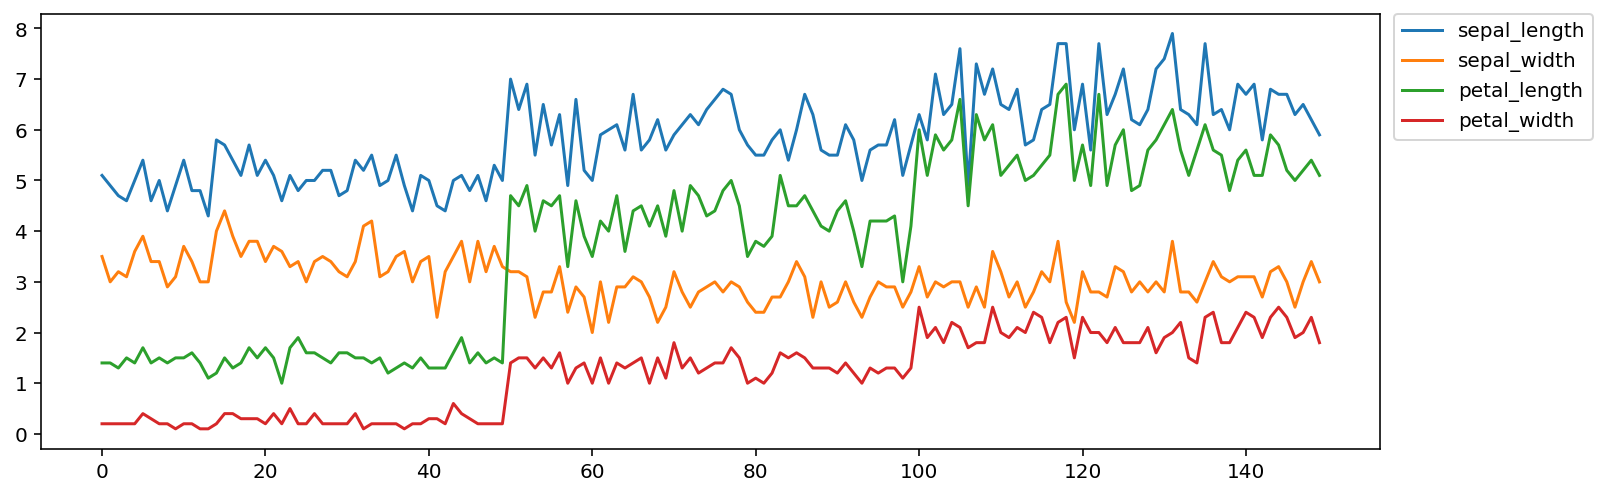

In [39]:
iris_df.plot(kind='line', figsize=(12,4))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()

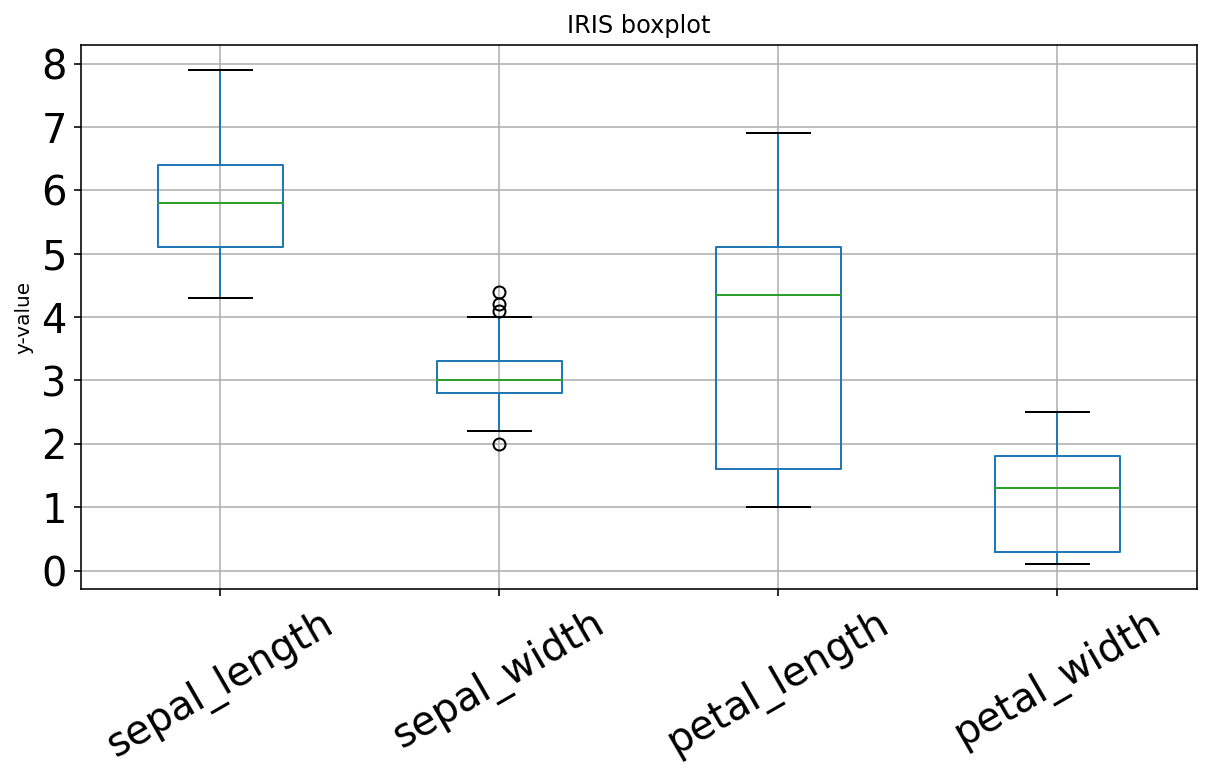

In [40]:
iris_df.plot(kind='box', figsize=(10,5), title='IRIS boxplot',
            ylabel='y-value', grid=True, fontsize=20, rot=30)
plt.show()

In [41]:
# iris_df에서 상관관계가 가장 높은 두 변수의 scatter plot을 그리시오 
iris_df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


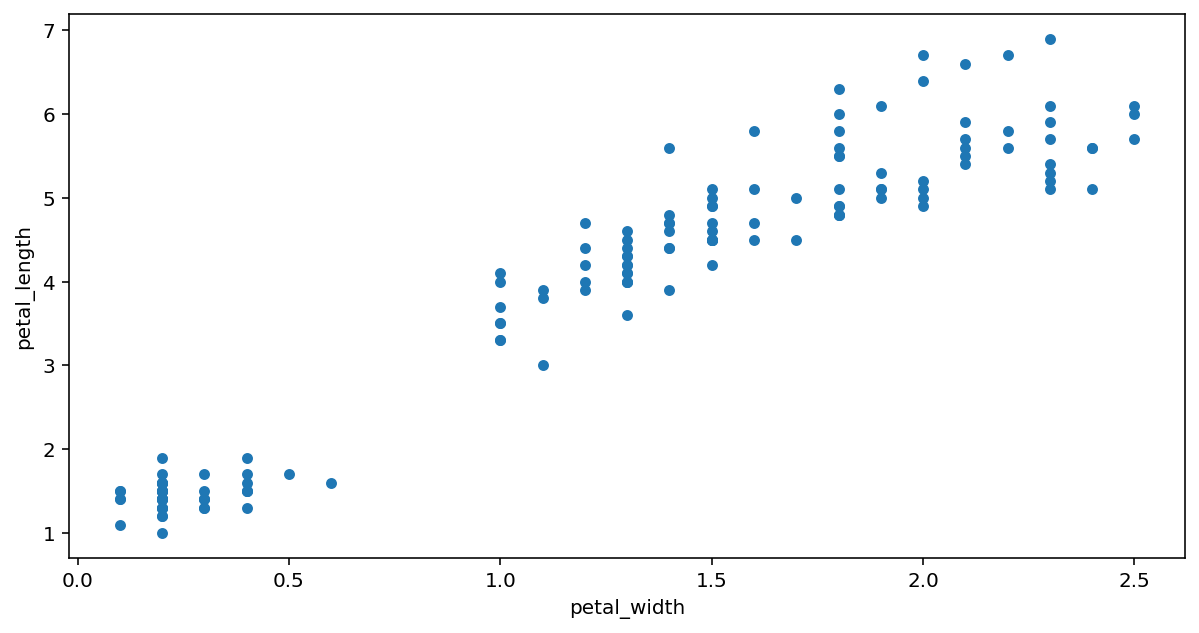

In [42]:
iris_df.plot(kind='scatter', x='petal_width', y='petal_length',
             figsize=(10,5))
plt.show()

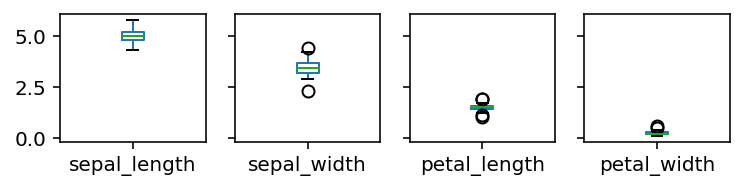

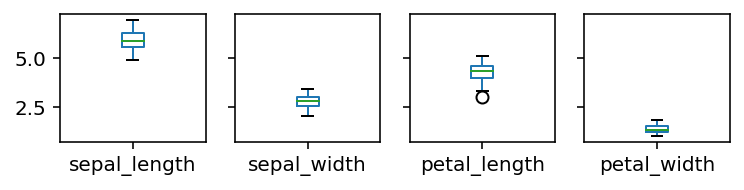

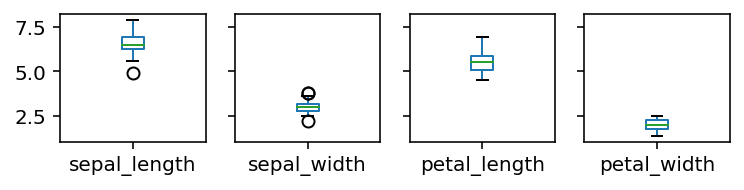

In [43]:
iris_df.groupby(iris_df['species']).plot(kind='box',
                                        subplots=True, #서브플롯으로 
                                        sharey=True,   # y축 공유                                       
                                        layout=(3,4))
plt.show()

### 4) pyplot.scatter(); 산점도

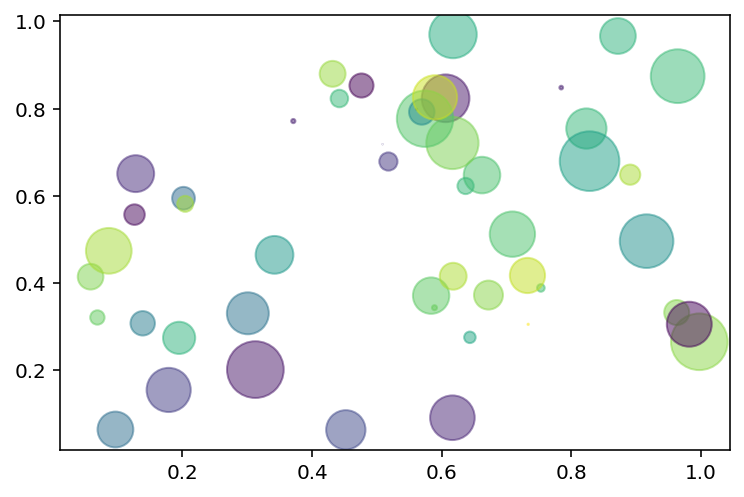

In [46]:
np.random.seed(2021) 
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (np.random.rand(N)*30)**2 

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
                # 마커의크기 / 색상 / 투명도 0(투명) 1(불투명)
plt.show()

## (5) 다양한 그래프 그리기 

<pre>
1) fill(), fill_between(), scatter() 
2) bar(), axvline(), axhline(), ...
3) hist(), boxplot(), violineplot()
</pre>

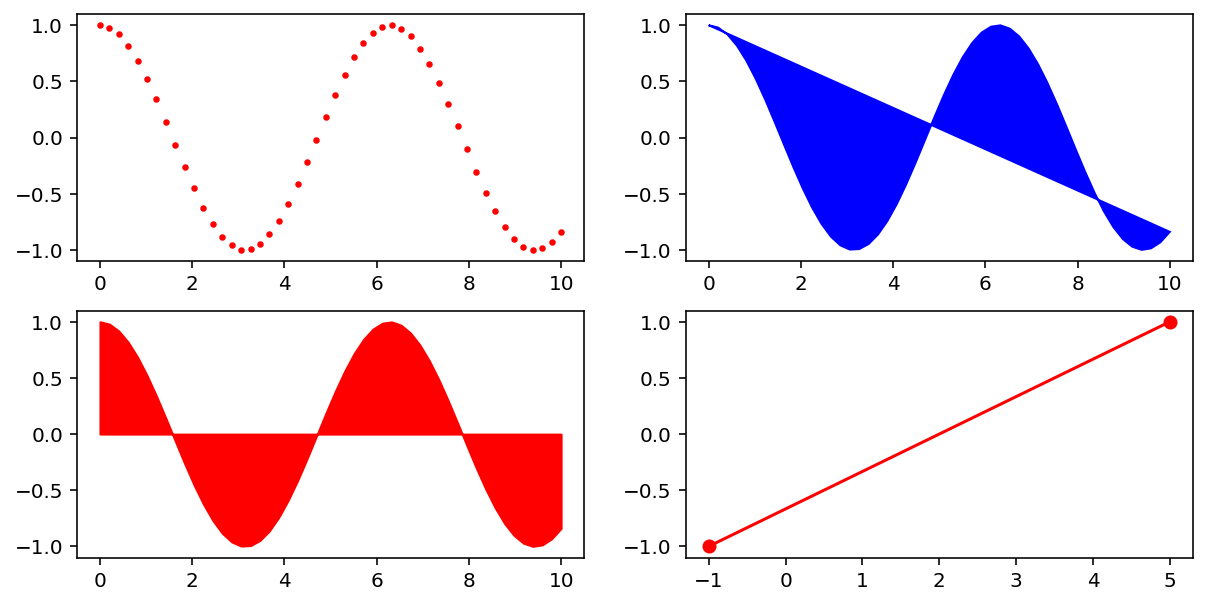

In [48]:
x = np.linspace(0,10)
y = np.cos(x)

fig, axes = plt.subplots(2, 2, figsize=(10,5))

axes[0,0].scatter(x, y, s=5, c='r', marker='o')
axes[0,1].fill(x, y, c='b')
axes[1,0].fill_between(x, y, color='r')
axes[1,1].plot([-1,5], [-1,1], 'ro-')

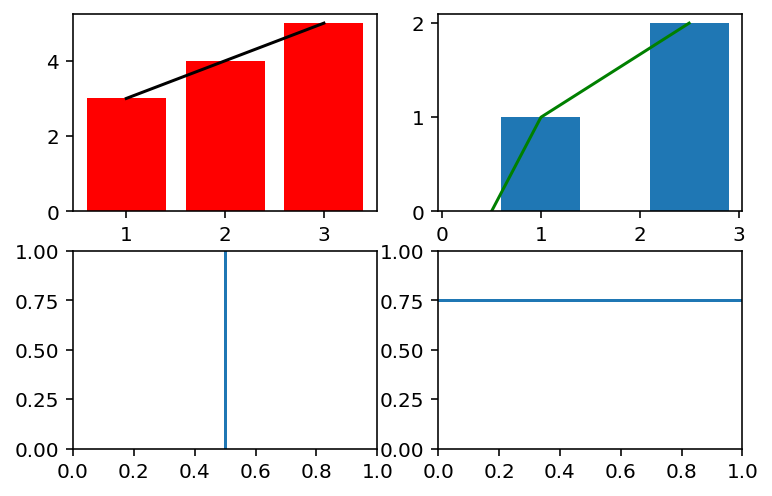

In [50]:
fig, axes = plt.subplots(2,2)

axes[0,0].bar([1,2,3], [3,4,5], color='r')
axes[0,0].plot([1,2,3], [3,4,5], 'k')
axes[0,1].bar([0.5, 1, 2.5], [0,1,2])
axes[0,1].plot([0.5, 1, 2.5], [0,1,2], 'g')
axes[1,0].axvline(0.5) # 수직선
axes[1,1].axhline(0.75) # 수평선

plt.show()

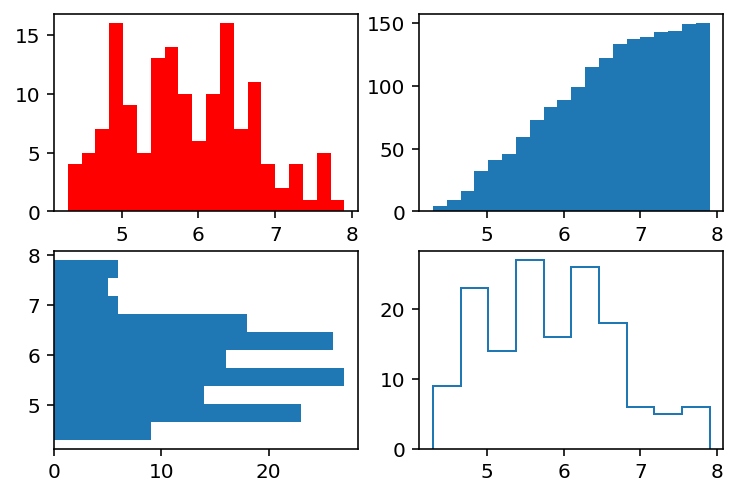

In [63]:
fig, axes = plt.subplots(2,2)

#빈도표
axes[0,0].hist(iris_df['sepal_length'], bins=20, color='r')
#누적빈도표
axes[0,1].hist(iris_df['sepal_length'], bins=20,  cumulative=True)
axes[1,0].hist(iris_df['sepal_length'], bins=10, 
               orientation='horizontal')
axes[1,1].hist(iris_df['sepal_length'], bins=10, histtype='step')

plt.show()

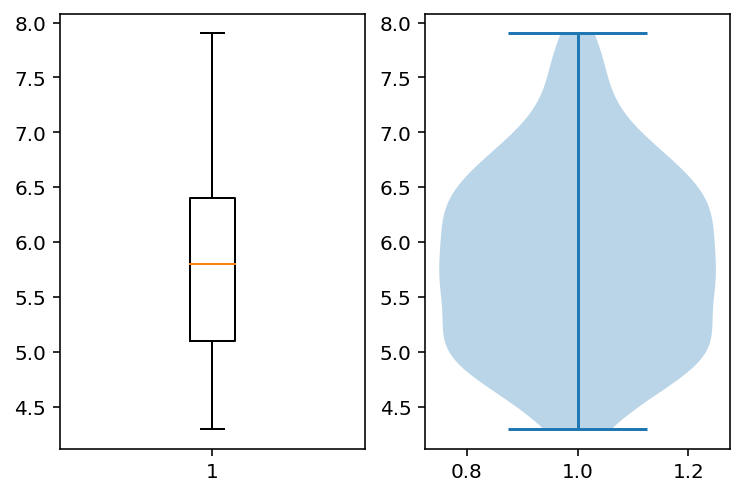

In [64]:
fig, axes = plt.subplots(1,2)

axes[0].boxplot(iris_df['sepal_length'])
axes[1].violinplot(iris_df['sepal_length'])

plt.show()

## (6) 그래프 커스터마이징

### 1) linestyle, linewidth

In [66]:
x = np.linspace(0,10,100)
y = np.cos(x)

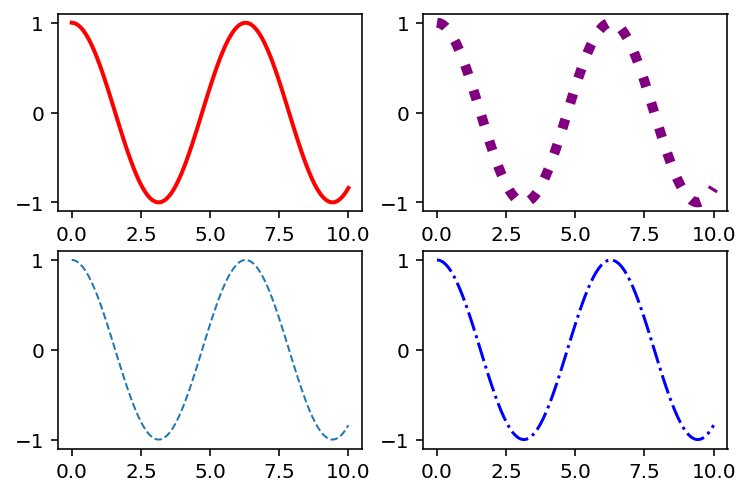

In [68]:
fig, axes = plt.subplots(2,2)

axes[0,0].plot(x, y, linewidth=2, color='r')
axes[0,1].plot(x, y, ls='dotted', linewidth=5, color='purple')
axes[1,0].plot(x, y, ls='--', linewidth=1)
axes[1,1].plot(x, y, ls='-.', c='b')  # ls = linestyle

plt.show()

### 2) text(), annotate()

Text(2, 0.75, 'Sine')

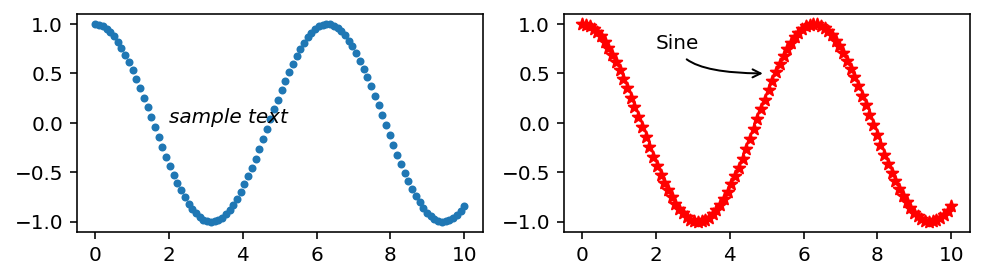

In [74]:
fig, axes = plt.subplots(1,2,figsize=(8,2))

axes[0].scatter(x, y, marker='.')
axes[0].text(2, 0, 'sample text', style='italic')
axes[1].scatter(x, y, marker='*', color='r')
axes[1].annotate('Sine', xytext=(2, 0.75), # 글자가 있을 좌표 위치
                xy=(5, 0.5), # 화살표가 가리킬 좌표 위치
                arrowprops=dict(arrowstyle='->',
                                connectionstyle='angle3'))

In [75]:
# 한글 기본폰트 설정 
plt.rc('font', family='Malgun Gothic') # Windows
# plt.rc('font', family='AppleGothic') # Mac
plt.rc('axes', unicode_minus=False) # 축

In [79]:
# 원하는 한글 폰트 지정 
import matplotlib.font_manager as fm

font_path = 'C:/Windows/Fonts/HMKMMAG.TTF'
font_prop = fm.FontProperties(fname=font_path, size=15)

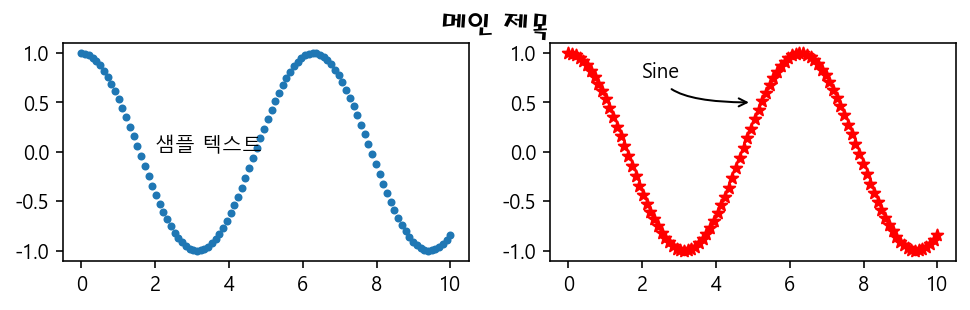

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(8,2))
plt.suptitle('메인 제목', fontproperties=font_prop)

axes[0].scatter(x, y, marker='.')
axes[0].text(2, 0, '샘플 텍스트', style='italic')
axes[1].scatter(x, y, marker='*', color='r')
axes[1].annotate('Sine', xytext=(2, 0.75), xy=(5, 0.5),
                 arrowprops=dict(arrowstyle='->', 
                                 connectionstyle='angle3'))

plt.show()

In [85]:
# 아래의 파일에 font.family를 조정하고 다시 실행
print(matplotlib.matplotlib_fname())

C:\Users\mupie\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


### 3) 수학기호 https://matplotlib.org/users/mathtext.html 

Text(2.5, 0.5, '$\\sum_{i=0}^\\infty X_i$')

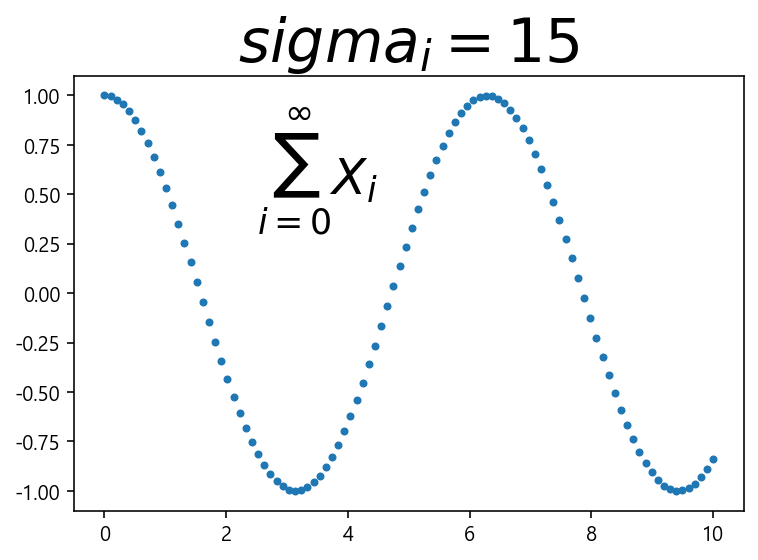

In [86]:
fig, ax = plt.subplots()

ax.scatter(x, y, marker='.')
ax.set_title(r'$sigma_i=15$', fontsize=30)
ax.text(2.5, 0.5, r'$\sum_{i=0}^\infty X_i$', fontsize=25)

### 4) 축과 눈금

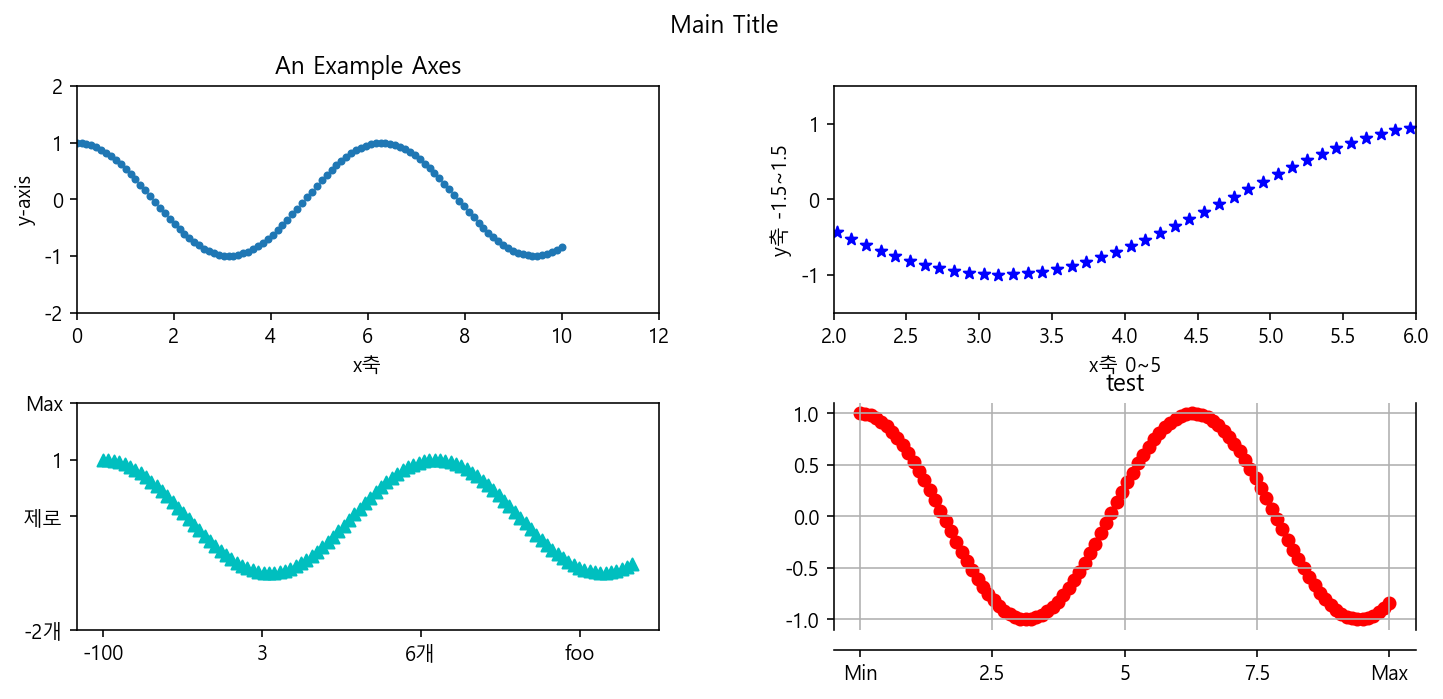

In [91]:
x = np.linspace(0, 10, 100)
y = np.cos(x)

fig , axes = plt.subplots(2, 2, figsize=(12, 5))

# plt.subplots_adjust()을 사용하여 서브플롯간의 간격 변경 
plt.subplots_adjust(hspace=0.4, wspace=0.3) 
                        # hspace 상하여백 / wspace 옆 여백 
plt.suptitle('Main Title')

axes[0,0].scatter(x, y, marker='.')
axes[0,0].set(title='An Example Axes', ylabel='y-axis', xlabel='x축',
              xlim=[0,12], ylim=[-2,2]) # 축 변경 
axes[0,1].scatter(x, y, marker='*', c='b')
axes[0,1].set_xlim(2,6)
axes[0,1].set_xlabel('x축 0~5')
axes[0,1].set_ylim(-1.5, 1.5)
axes[0,1].set_ylabel('y축 -1.5~1.5')
axes[1,0].scatter(x, y, marker='^', c='c')
# x축 눈금 위치 
axes[1,0].set_xticks(range(0,11,3))
axes[1,0].set_xticklabels([-100, 3, '6개', 'foo'])
axes[1,0].set_yticks([-2, 0, 1, 2])
axes[1,0].set_yticklabels(['-2개', '제로', 1, 'Max'])
axes[1,1].scatter(x, y, c='r')
axes[1,1].set(xticks=[0, 2.5, 5, 7.5, 10],
              xticklabels=['Min', 2.5, 5, 7.5, 'Max'],
              title='test')
axes[1,1].grid(True)
axes[1,1].spines['top'].set_visible(False)
axes[1,1].spines['bottom'].set_position(('outward', 10))

plt.show()

### 5) 축 공유 

In [93]:
x = np.arange(0, 10)
y1 = 0.5*x**2 # 0.5*(x**2)
y2 = -1 * y1

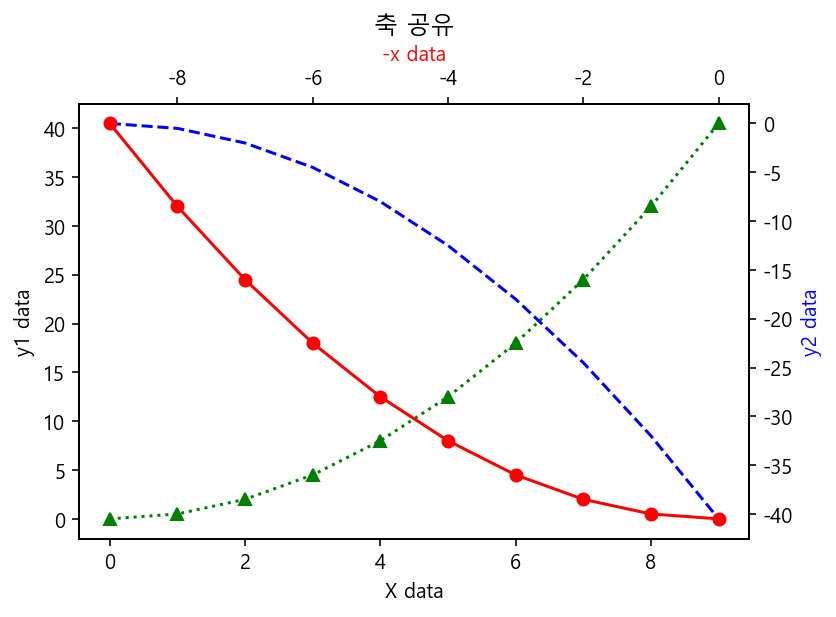

In [95]:
fig, ax1 = plt.subplots()

ax1.plot(x, y1, 'g^:')
ax1.set(xlabel='X data', ylabel='y1 data', title='축 공유')

ax2 = ax1.twinx() # ax1과 x축을 공유하는 ax2
ax2.plot(x, y2, 'b--')
ax2.set_ylabel('y2 data', color='b')

ax3 = ax1.twiny() # ax1과 x축을 공유하는 ax3
ax3.plot(-x, y1, 'ro-')
ax3.set_xlabel('-x data', color='r')

plt.show()

### 6) 범례 표시

In [96]:
x = np.arange(0,10)
y = 0.2*x**2

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례를 밖으로 예제 참조

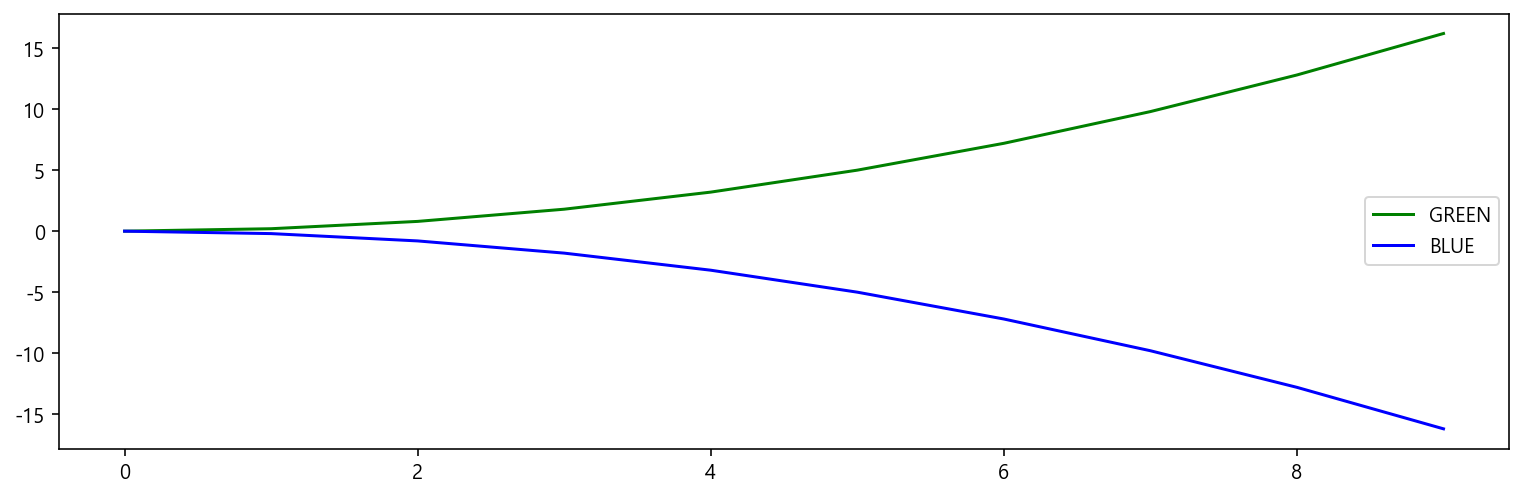

In [99]:
fig , ax = plt.subplots(figsize=(13,4))

ax.plot(x, y, 'g', label='GREEN')
ax.plot(x, -y, 'b', label='BLUE')
ax.legend()
plt.legend(loc='center right', bbox_to_anchor=(1.0, 0.5), ncol=1)
plt.savefig('data/ch13.png') # 그래프를 파일로 저장하고자 할 때 